# Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df=pd.read_csv(r"C:\Users\shali\Downloads\credit.csv")
df.head(5)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [3]:
df.shape

(100000, 28)

In [4]:
df.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

# Exploratory Data Analysis 

In [6]:
df=df.drop(['ID','Customer_ID','Month','Name','SSN'],axis=1)
df.head(3)

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


In [7]:
#Extracting the categorical columns
string_cols=df.dtypes[df.dtypes==object].index
cat_cols=df[string_cols.drop('Credit_Score')]
cat_cols

,Occupation,Type_of_Loan,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Small_value_payments
1,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Large_value_payments
2,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Medium_value_payments
3,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,Low_spent_Small_value_payments
4,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",Good,No,High_spent_Medium_value_payments
...,...,...,...,...,...
99995,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments
99996,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Medium_value_payments
99997,Mechanic,"Auto Loan, and Student Loan",Good,No,High_spent_Large_value_payments
99998,Mechanic,"Auto Loan, and Student Loan",Good,No,Low_spent_Large_value_payments


In [8]:
df['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

In [9]:
df['Credit_Mix'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [10]:
#Extracting numerical columns
numerical_cols=df.dtypes[df.dtypes!=object].index
num_cols=df[numerical_cols]
num_cols

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,26.822620,265.0,49.574949,21.465380,312.494089
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,4.0,11.27,4.0,809.98,31.944960,266.0,49.574949,21.465380,284.629162
2,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,4.0,809.98,28.609352,267.0,49.574949,21.465380,331.209863
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,4.0,809.98,31.377862,268.0,49.574949,21.465380,223.451310
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,4.0,11.27,4.0,809.98,24.797347,269.0,49.574949,21.465380,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,23.0,7.0,11.50,3.0,502.38,34.663572,378.0,35.104023,24.028477,479.866228
99996,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,18.0,7.0,11.50,3.0,502.38,40.565631,379.0,35.104023,24.028477,496.651610
99997,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,27.0,6.0,11.50,3.0,502.38,41.255522,380.0,35.104023,24.028477,516.809083
99998,25.0,39628.99,3359.415833,4.0,6.0,7.0,2.0,20.0,6.0,11.50,3.0,502.38,33.638208,381.0,35.104023,24.028477,319.164979


In [11]:
num_cols.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


Text(0.5, 1.0, 'HEATMAP')

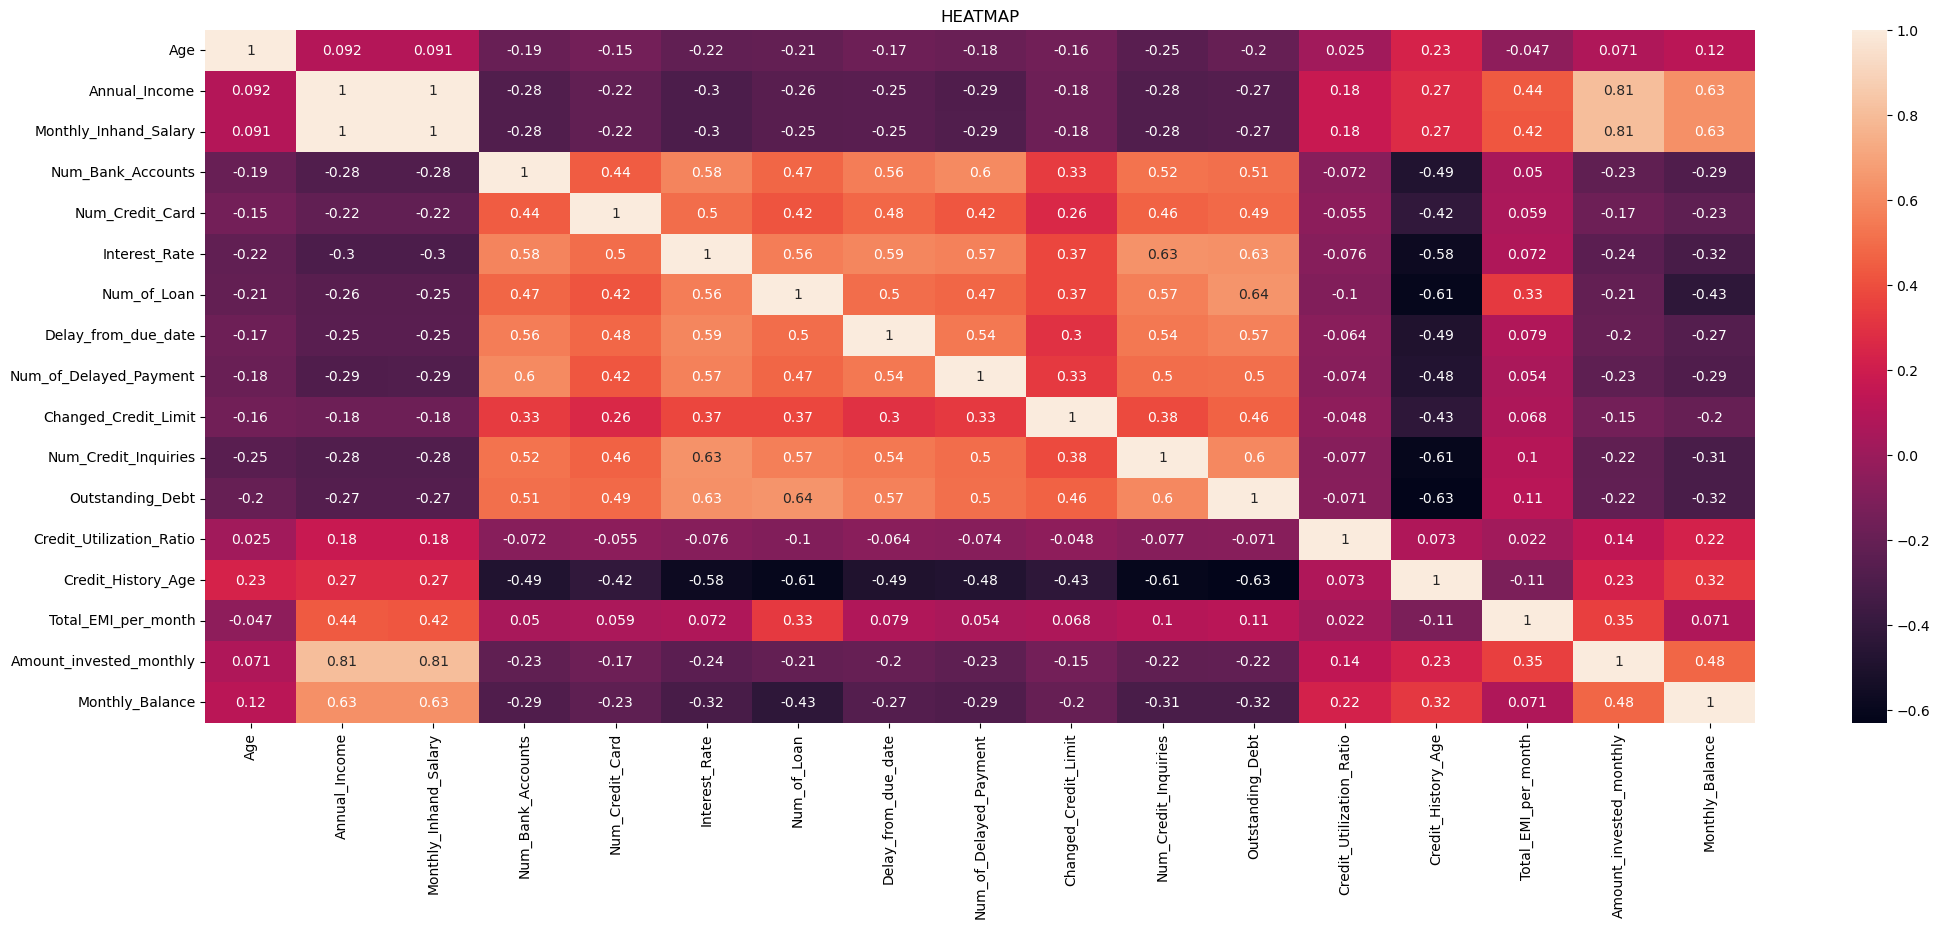

In [12]:
plt.figure(figsize=(25,9))
sns.heatmap(num_cols.corr(),annot=True)
plt.title('HEATMAP')

In [13]:
# Monthly inhand salary and Annual income are perfectly correlated.

# Preprocessing

In [14]:
df.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [15]:
# calculate IQR
Q1=num_cols.quantile(0.25)
Q3=num_cols.quantile(0.75)
IQR=Q3-Q1

# define threshold
threshold=3.5

# identify outliers
outliers=num_cols[(num_cols<Q1-threshold*IQR) | (num_cols>Q3+threshold*IQR)]

# get outliers
print('Outliers:')
outliers.nunique()

Outliers:


Age                           0
Annual_Income                 0
Monthly_Inhand_Salary         0
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Changed_Credit_Limit          0
Num_Credit_Inquiries          0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age            0
Total_EMI_per_month         293
Amount_invested_monthly      53
Monthly_Balance             199
dtype: int64

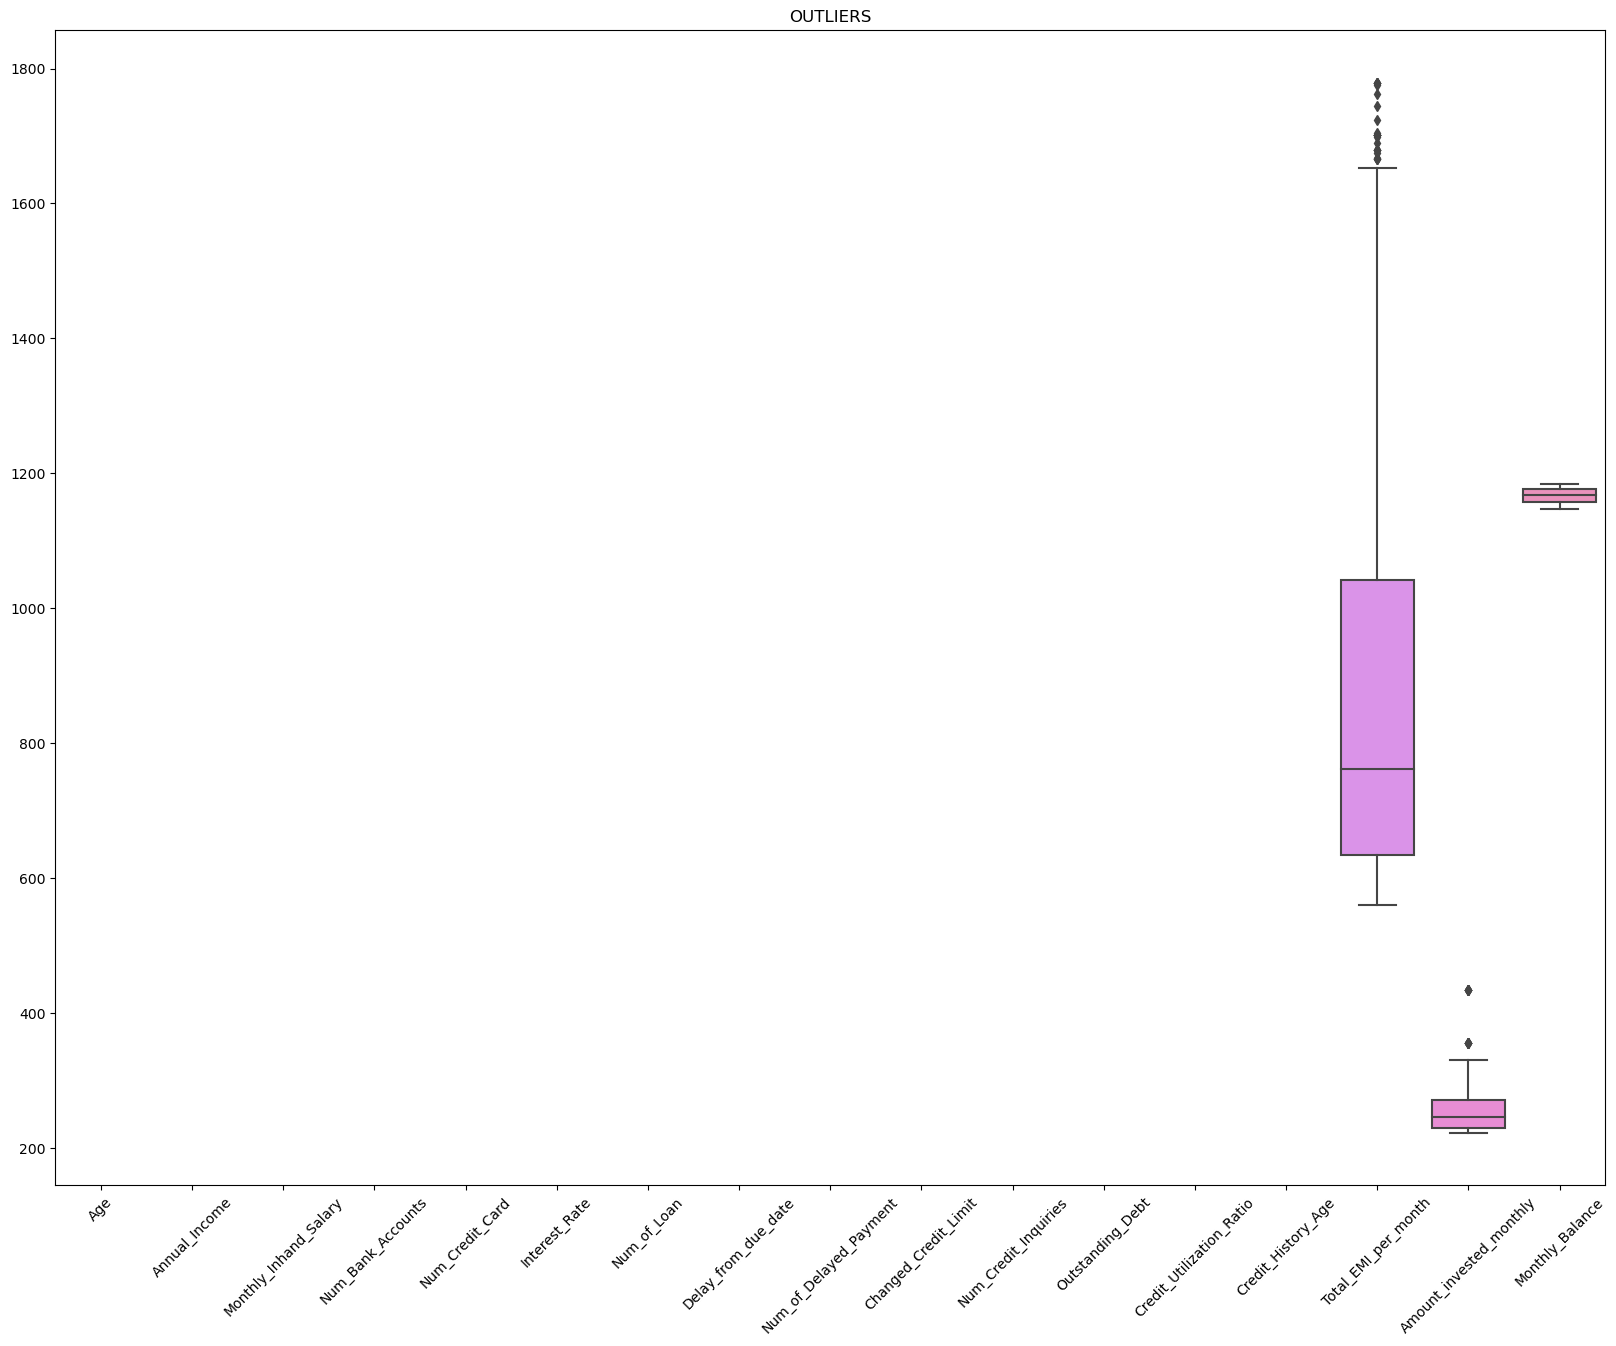

In [16]:
#Boxplot of the outliers
plt.figure(figsize=(20,15))
sns.boxplot(data=outliers)
plt.xticks(rotation=45)
plt.title('OUTLIERS')
plt.show()

# Data Visualization 

In [17]:
#### Univariate Analysis

Text(0.5, 1.0, 'COUNT PLOT OF OCCUPATION')

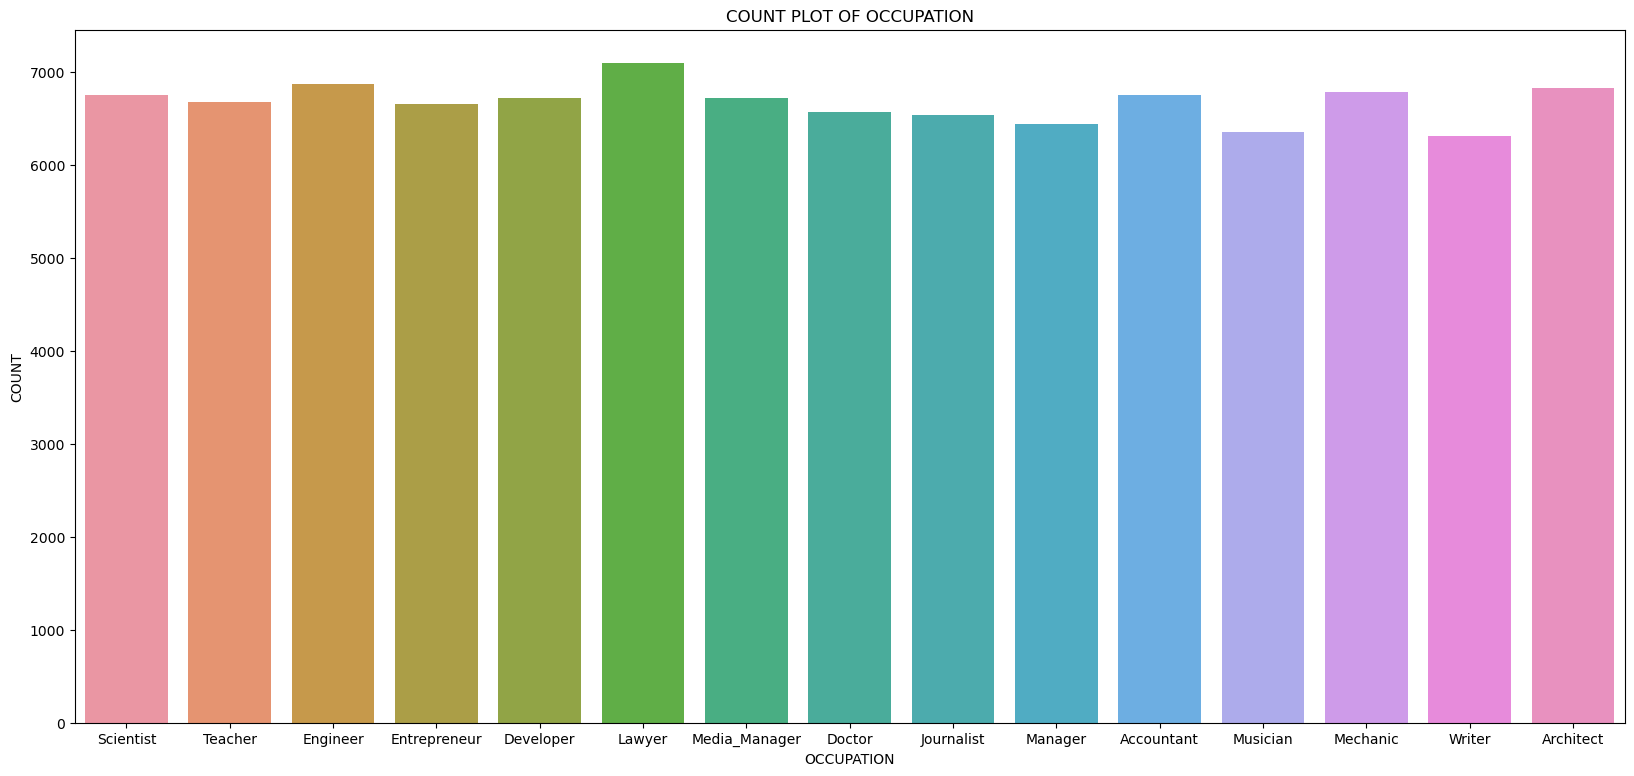

In [18]:
plt.figure(figsize=(20,9))
sns.countplot(data=df,x='Occupation')
plt.xlabel('OCCUPATION')
plt.ylabel('COUNT')
plt.title('COUNT PLOT OF OCCUPATION')

In [19]:
# Each occupation have almost same number of customers.There is not a vast difference in their number. 

In [20]:
#### BiVariate Analysis

Text(0.5, 1.0, 'BARPLOT OF CREDIT SCORE ON BASIS OF ANNUAL INCOME')

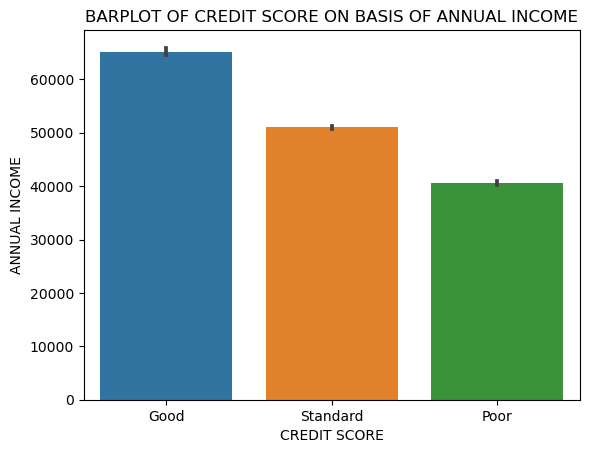

In [21]:
sns.barplot(data=df,y='Annual_Income',x='Credit_Score')
plt.ylabel('ANNUAL INCOME')
plt.xlabel('CREDIT SCORE')
plt.title('BARPLOT OF CREDIT SCORE ON BASIS OF ANNUAL INCOME')

In [22]:
# People with a good annual income have a perfect credit score

In [23]:
df['Payment_Behaviour'].unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

Text(0.5, 1.0, 'COUNT PLOT OF PAYMENT BEHAVIOUR')

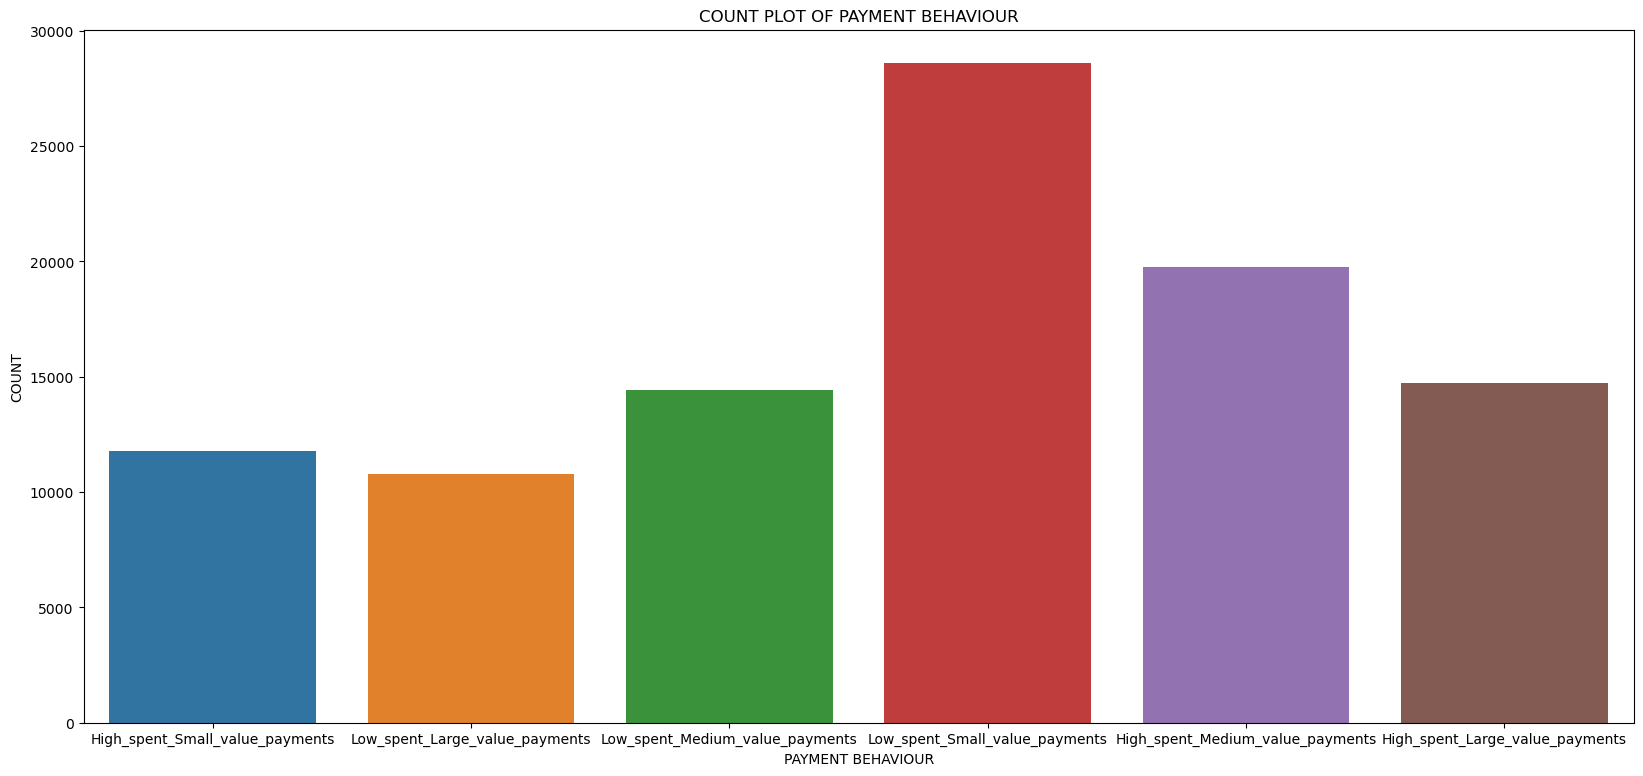

In [24]:
plt.figure(figsize=(20,9))
sns.countplot(data=df,x='Payment_Behaviour')
plt.xlabel('PAYMENT BEHAVIOUR')
plt.ylabel('COUNT')
plt.title('COUNT PLOT OF PAYMENT BEHAVIOUR')

In [25]:
# People are tending to make low spent small value payments

In [26]:
#### Multivariate Analysis

<Axes: xlabel='Annual_Income', ylabel='Payment_Behaviour'>

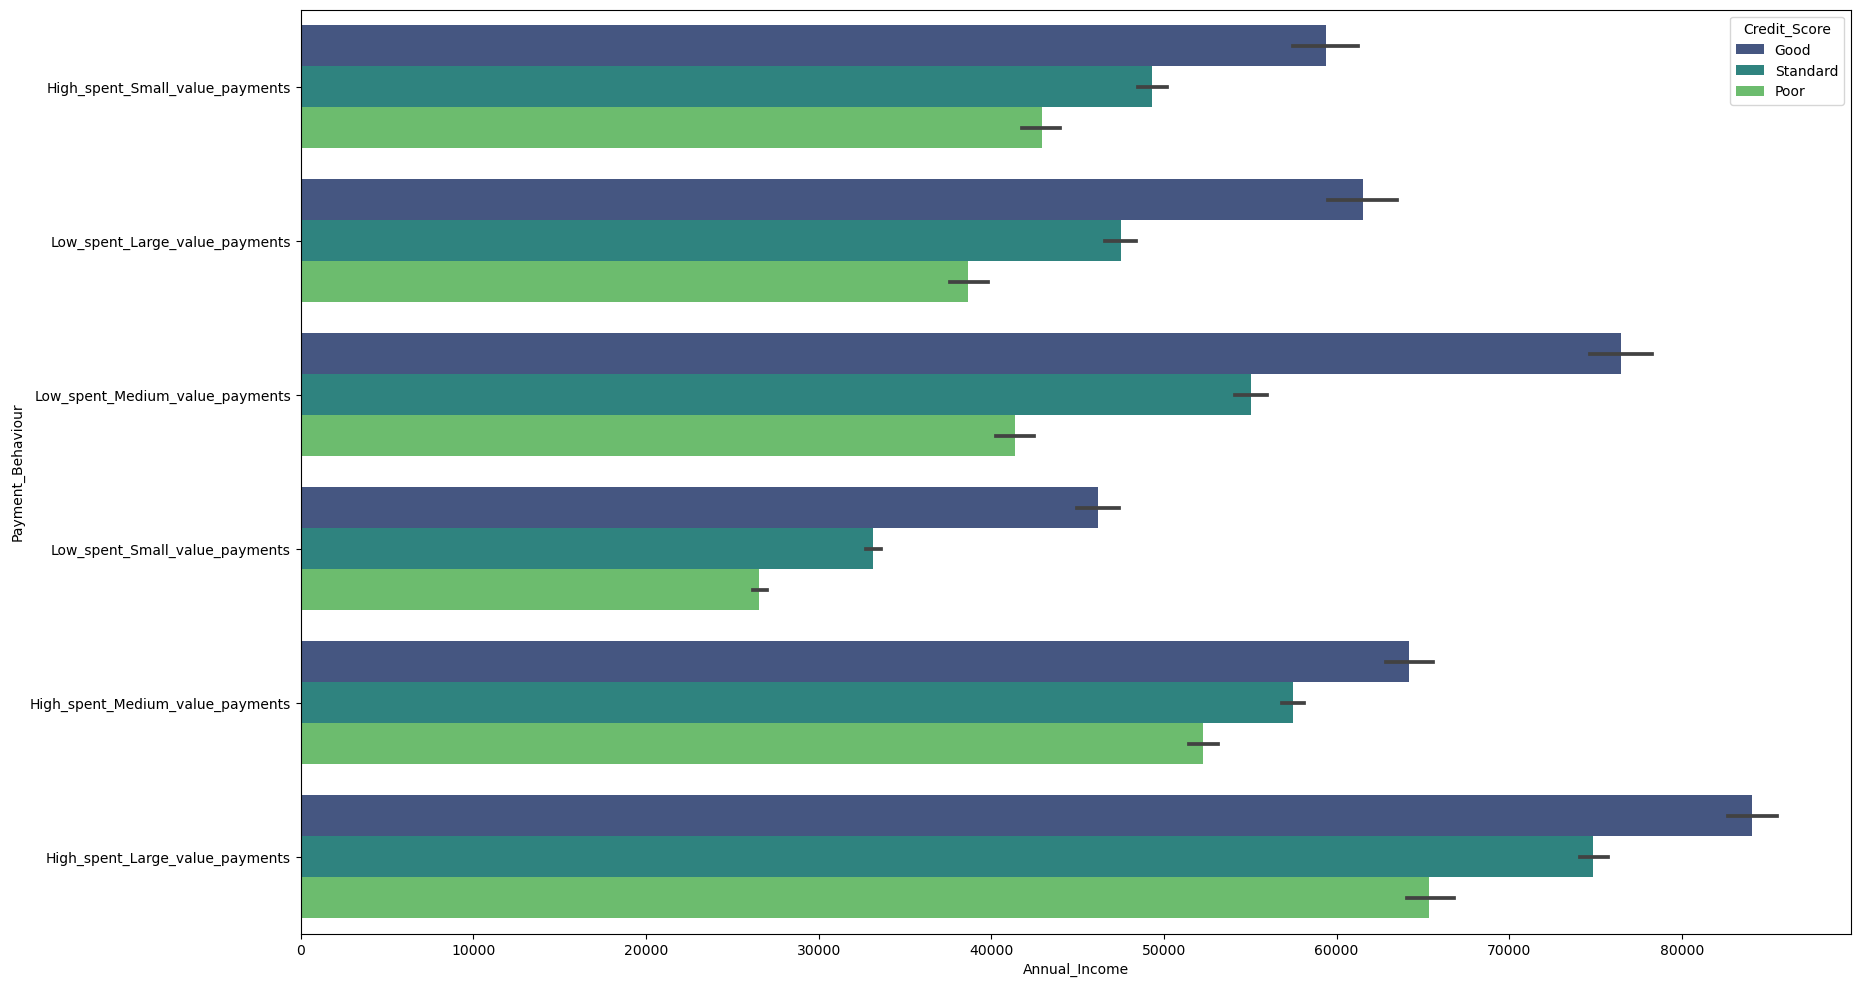

In [27]:
plt.figure(figsize=(20,12))
sns.barplot(data=df,x='Annual_Income',y='Payment_Behaviour',hue='Credit_Score',palette='viridis')

In [28]:
df['Type_of_Loan'].unique()

array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [29]:
df['Type_of_Loan'].nunique()

6261

In [30]:
import re

def process_type_of_loan(df):
    # Initialize an empty set to store unique loan types
    unique_items = set()
    
    # Define delimiters and patterns to remove
    delimiters = [',', '/', '&', '|']
    patterns_to_remove = [r'\s+and\s+', r'\s+a\s+', r'\s+(?=\')']

    # Iterate over each row in the 'Type_of_Loan' column
    for item_list in df['Type_of_Loan']:
        # Apply patterns to remove and split the string
        for pattern in patterns_to_remove:
            item_list = re.sub(pattern, ',', item_list)
        items = re.split('|'.join(map(re.escape, delimiters)), item_list)
        unique_items.update(items)

    # Remove leading and trailing whitespace from loan types
    unique_items = {item.strip() for item in unique_items if item.strip()}
    
    # Create a dictionary to hold binary indicators for each unique loan type
    indicators = {}
    for item in unique_items:
        # Create a binary indicator column for each loan type
        indicators[item] = df['Type_of_Loan'].apply(lambda x: item in x).astype(int)

    # Create a new DataFrame with binary indicators
    result_df = pd.DataFrame(indicators)
    
    return result_df


In [31]:
cat_cols=pd.concat([cat_cols,process_type_of_loan(df)],axis=1).drop('Type_of_Loan',axis=1)
cat_cols

,Occupation,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,Auto Loan,Not Specified,Home Equity Loan,Payday Loan,No Data,Personal Loan,Mortgage Loan,Credit-Builder Loan,Student Loan,Debt Consolidation Loan
0,Scientist,Good,No,High_spent_Small_value_payments,1,0,1,0,0,1,0,1,0,0
1,Scientist,Good,No,Low_spent_Large_value_payments,1,0,1,0,0,1,0,1,0,0
2,Scientist,Good,No,Low_spent_Medium_value_payments,1,0,1,0,0,1,0,1,0,0
3,Scientist,Good,No,Low_spent_Small_value_payments,1,0,1,0,0,1,0,1,0,0
4,Scientist,Good,No,High_spent_Medium_value_payments,1,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Mechanic,Good,No,High_spent_Large_value_payments,1,0,0,0,0,0,0,0,1,0
99996,Mechanic,Good,No,High_spent_Medium_value_payments,1,0,0,0,0,0,0,0,1,0
99997,Mechanic,Good,No,High_spent_Large_value_payments,1,0,0,0,0,0,0,0,1,0
99998,Mechanic,Good,No,Low_spent_Large_value_payments,1,0,0,0,0,0,0,0,1,0


In [32]:
cat_cols.nunique()

Occupation                 15
Credit_Mix                  3
Payment_of_Min_Amount       3
Payment_Behaviour           6
Auto Loan                   2
Not Specified               2
Home Equity Loan            2
Payday Loan                 2
No Data                     2
Personal Loan               2
Mortgage Loan               2
Credit-Builder Loan         2
Student Loan                2
Debt Consolidation Loan     2
dtype: int64

# Encoding

In [33]:
cat_cols = pd.get_dummies(cat_cols)
cat_cols.head()

,Auto Loan,Not Specified,Home Equity Loan,Payday Loan,No Data,Personal Loan,Mortgage Loan,Credit-Builder Loan,Student Loan,Debt Consolidation Loan,...,Credit_Mix_Standard,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Large_value_payments,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1,0,1,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0


In [34]:
cat_cols.columns

Index(['Auto Loan', 'Not Specified', 'Home Equity Loan', 'Payday Loan',
       'No Data', 'Personal Loan', 'Mortgage Loan', 'Credit-Builder Loan',
       'Student Loan', 'Debt Consolidation Loan', 'Occupation_Accountant',
       'Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor',
       'Occupation_Engineer', 'Occupation_Entrepreneur',
       'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager',
       'Occupation_Mechanic', 'Occupation_Media_Manager',
       'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher',
       'Occupation_Writer', 'Credit_Mix_Bad', 'Credit_Mix_Good',
       'Credit_Mix_Standard', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'P

# Splitting the dataset  

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x=pd.concat([num_cols,cat_cols],axis=1)
y=df['Credit_Score']

In [37]:
# Splitting data into train and test sets (80% train, 20% test)
x_train,y_train,x_test,y_test= train_test_split(x,y,test_size=0.2,random_state=42)

In [38]:
from sklearn.model_selection import KFold
kv=KFold(10)

In [39]:
for train_index,test_index in kv.split(x,y):
    print('Training Index=',train_index)
    print('Test Index=',test_index)

Training Index= [10000 10001 10002 ... 99997 99998 99999]
Test Index= [   0    1    2 ... 9997 9998 9999]
Training Index= [    0     1     2 ... 99997 99998 99999]
Test Index= [10000 10001 10002 ... 19997 19998 19999]
Training Index= [    0     1     2 ... 99997 99998 99999]
Test Index= [20000 20001 20002 ... 29997 29998 29999]
Training Index= [    0     1     2 ... 99997 99998 99999]
Test Index= [30000 30001 30002 ... 39997 39998 39999]
Training Index= [    0     1     2 ... 99997 99998 99999]
Test Index= [40000 40001 40002 ... 49997 49998 49999]
Training Index= [    0     1     2 ... 99997 99998 99999]
Test Index= [50000 50001 50002 ... 59997 59998 59999]
Training Index= [    0     1     2 ... 99997 99998 99999]
Test Index= [60000 60001 60002 ... 69997 69998 69999]
Training Index= [    0     1     2 ... 99997 99998 99999]
Test Index= [70000 70001 70002 ... 79997 79998 79999]
Training Index= [    0     1     2 ... 99997 99998 99999]
Test Index= [80000 80001 80002 ... 89997 89998 89999